In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from math import ceil

dataset_path = 'words_stream.txt' # path to the sampled dataset
counts_path = 'counts.txt' # path to the counts file
hash_path = 'hash_params.txt' # path to hash parameters file
p = 123457
delta = 10**-5
epsilon = 10**-4
buckets = ceil(10/epsilon)

In [2]:
dataset_path = 'words_stream.txt' # path to the sampled dataset
counts_path = 'counts.txt' # path to the counts file
hash_path = 'hash_params.txt' # path to hash parameters file
p = 123457
delta = 10**-5
epsilon = 10**-4
buckets = ceil(10/epsilon)

In [3]:
def estimate(dataset_path, counts_path, hash_path, delta, epsilon, p):
    hash_params = np.loadtxt(hash_path)
    counts = np.loadtxt(counts_path)
    words_stream = np.loadtxt(dataset_path)
    def hash(a,b,p,buckets,x):
        p = 123457
#     print(type(p))
        y = int(x)%p
#     print(type(y))
        hash_val = (a*y+b)%p
#     print(type(hash_val))
        return int(hash_val%buckets)
    
    hash_params = np.loadtxt(hash_path)
    ablist = hash_params.tolist()
    # len(ablist)
    # ablist
    ablist2 = []
    for i in range(len(ablist)):
        (a,b) = ablist[i]
        ablist2.append((a,b))

#     ablist2 #list of tuples
#c(j,x) for j in (1-5) and x in (1-100000 buckets).

# matrix a,b is numpy array. 2 columns

# size len(hash_params) x no of buckets

    countmatrix = np.zeros((len(hash_params), buckets))
    countmatrix.shape

    import csv
    with open(dataset_path, 'r') as data_file:
        countmatrix = np.zeros((len(hash_params), buckets))
        reader = csv.reader(data_file)
        for row in reader:
    #         print (row[0])
            j = 0
            for a,b in ablist2:
    #             print(a,b)
                hashedval = hash(a,b,p,buckets,row[0])
    #             print(hashedval)
                countmatrix[j][hashedval] +=1
                j+=1
            
            

    with open (counts_path, 'r') as counts_file:
        ftilde2 = []
        flist = []
        reader = csv.reader(counts_file, delimiter='\t')
    #     linecounter = 0
        for row in reader:
            min = 1000000000
            j=0
            flist.append(row[1])
            for a,b in ablist2:
    #             print('line ', line)
                hashedval = hash(a,b,p,buckets,row[0])
    #             for j in range(5):

    #             if countmatrix[j][hashedval]< min:
    #                 min = countmatrix[j][hashedval]
    #             print(hashedval)
    #             print ('j',j,'hashedval',hashedval,'countmatrix', countmatrix[j][hashedval])
                if countmatrix[j][hashedval]< min:
                    min = countmatrix[j][hashedval]
                j+=1
    #         print('min:', min)

            ftilde2.append(min)
    #         linecounter +=1
    #         if( linecounter == 2):
    #             break

            
    errlist = []
    flist2 = [float(i) for i in flist]
    for i,j in zip(flist2,ftilde2):
        error = (j-i)/i
    #     err = round(error, 4)
        errlist.append(error)
#     print(err)

    i = []
    for ij in range(1,len(errlist)+1):
        i.append(ij)

    
    return i, errlist, ftilde2, flist2

In [4]:
i, errlist, ftilde2, flist2 = estimate(dataset_path, counts_path, hash_path, delta, epsilon, p)

# Plot for i Vs Actual value of count

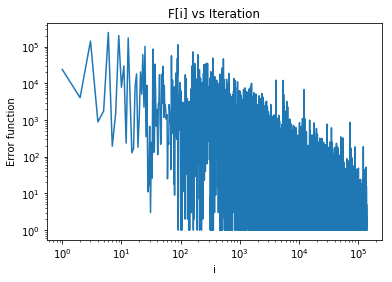

In [6]:
plt.loglog(i, flist2) 
# naming the x axis 
plt.xlabel('i') 
# naming the y axis 
plt.ylabel('Error function') 
# plt.yticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('F[i] vs Iteration') 
  
# function to show the plot 
plt.show() 

# Plot for i vs Predicted value of count

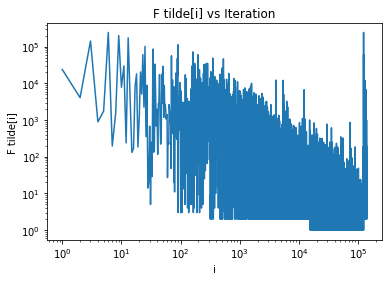

In [8]:
plt.loglog(i, ftilde2) 
# naming the x axis 
plt.xlabel('i') 
# naming the y axis 
plt.ylabel('F tilde[i] ') 
# plt.yticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('F tilde[i] vs Iteration') 
  

plt.show() 

# Plot for i Vs error

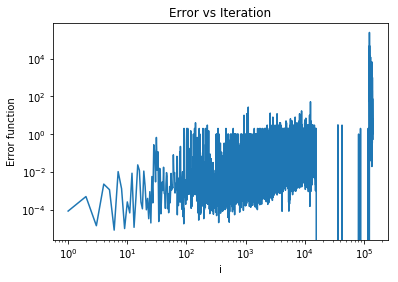

In [10]:
plt.loglog(i, errlist) 
# naming the x axis 
plt.xlabel('i') 
# naming the y axis 
plt.ylabel('Error function') 
# plt.yticks(np.arange(1,41,2))
# plt.yticks(np.arange(45749,190179))
# giving a title to my graph 
plt.title('Error vs Iteration') 
  

plt.show() 